In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from pylab import rcParams
#rcParams['figure.figsize']=20,10

In [2]:
data_by_month=pd.read_excel("DatabyMonth-135-8years.xlsx")
data_by_month.head()

,Truck
0,39
1,41
2,57
3,61
4,54


In [3]:
index=pd.date_range(start='2011',end='2019',freq='M',name='Date')
#index

In [4]:
data_by_month.index=index
data_by_month.head()

,Truck
Date,
2011-01-31,39
2011-02-28,41
2011-03-31,57
2011-04-30,61
2011-05-31,54


In [5]:
month=np.linspace(1,96,96).reshape(-1,1)

In [6]:
data_by_month['Month']=month.astype(int)
data_by_month

,Truck,Month
Date,,
2011-01-31,39,1
2011-02-28,41,2
2011-03-31,57,3
2011-04-30,61,4
2011-05-31,54,5
...,...,...
2018-08-31,10,92
2018-09-30,27,93
2018-10-31,19,94


In [7]:
#data_by_month['Month']=data_by_month.index.month
#data_by_month

In [8]:
y=data_by_month.iloc[:,0]

In [9]:
X=data_by_month.iloc[:,1]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33 ,random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((64,), (32,), (64,), (32,))

In [11]:
lr=LinearRegression()

In [12]:
lr.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression()

In [13]:
y_pred=lr.predict(X_test.values.reshape(-1,1))
y_pred.shape

(32,)

In [14]:
mean_absolute_error(y_test,y_pred)

6.479251298956941

In [15]:
r2_score(y_test,y_pred)

0.5941098027535703

In [16]:
y_pred=pd.DataFrame(y_pred)
y_pred.index=y_test.index

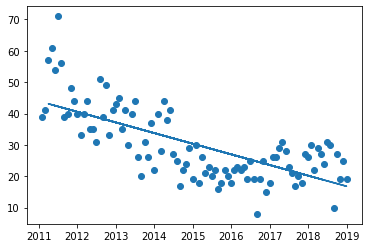

In [17]:
plt.scatter(data_by_month.index,data_by_month.Truck)
plt.plot(y_pred)

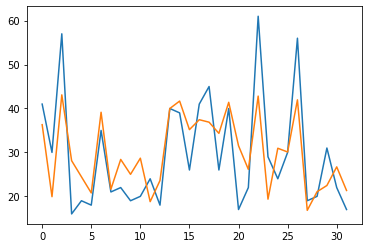

In [19]:
plt.plot(y_test.values)
plt.plot(y_pred.values)

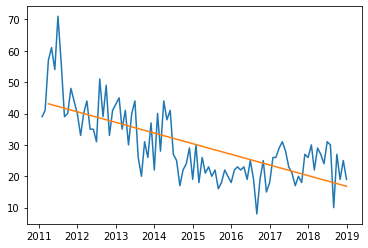

In [20]:
plt.plot(data_by_month.Truck)
plt.plot(y_pred.sort_index())

In [21]:
pl=PolynomialFeatures(degree=2)

In [22]:
X_train=pl.fit_transform(X_train.values.reshape(-1,1))
X_test=pl.fit_transform(X_test.values.reshape(-1,1))
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((64, 3), (32, 3), (64,), (32,))

In [23]:
pl2=LinearRegression()

In [24]:
pl2.fit(X_train,y_train)

LinearRegression()

In [25]:
y_pred=pl2.predict(X_test)

In [26]:
y_pred=pd.DataFrame(y_pred,columns=['y_pred'])
y_pred.index=y_test.index
y_pred.head()

,y_pred
Date,
2013-03-31,34.992978
2018-01-31,22.908301
2011-03-31,50.760812
2015-08-31,24.349379
2016-09-30,22.565373


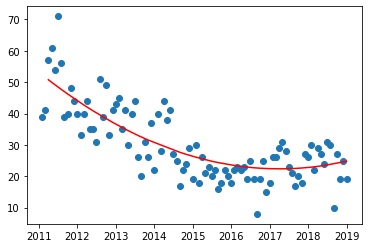

In [27]:
plt.scatter(data_by_month.index,data_by_month.Truck)
plt.plot(y_pred.sort_index(),color='r')

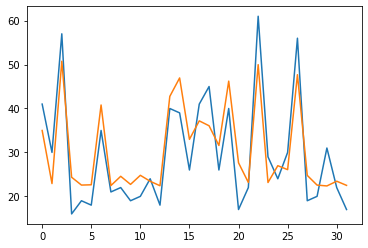

In [28]:
plt.plot(y_test.values)
plt.plot(y_pred.values)

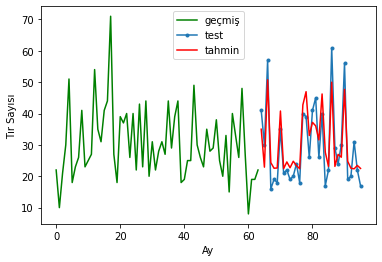

In [29]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="geçmiş")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="test")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred.values, 'r', label="tahmin")
plt.ylabel('Tır Sayısı')
plt.xlabel('Ay')
plt.legend()
plt.show();

In [30]:
mean_absolute_error(y_test,y_pred)

5.287942546601215

In [31]:
r2_score(y_test,y_pred)

0.7708254472858291

In [32]:
'''
mse = []
degrees = np.arange(1,30)
min_mse, min_deg = 1e10, 0

for deg in range(1,30):
    poly_features=PolynomialFeatures(degree=deg)
    x_poly=poly_features.fit_transform(X)
    
    poly_reg =LinearRegression()
    poly_reg.fit(x_poly,y)
    y_pred=poly_reg.predict(x_poly)
    poly_mse=mean_squared_error(y,y_pred)
    mse.append(poly_mse)
    print(deg,'. degree error:',poly_mse)
    
    if min_mse > poly_mse:
        min_mse = poly_mse
        min_deg = deg

print('Best degree {} with MSE {}'.format(min_deg, min_mse))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, mse)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('MSE')'''

"\nmse = []\ndegrees = np.arange(1,30)\nmin_mse, min_deg = 1e10, 0\n\nfor deg in range(1,30):\n    poly_features=PolynomialFeatures(degree=deg)\n    x_poly=poly_features.fit_transform(X)\n    \n    poly_reg =LinearRegression()\n    poly_reg.fit(x_poly,y)\n    y_pred=poly_reg.predict(x_poly)\n    poly_mse=mean_squared_error(y,y_pred)\n    mse.append(poly_mse)\n    print(deg,'. degree error:',poly_mse)\n    \n    if min_mse > poly_mse:\n        min_mse = poly_mse\n        min_deg = deg\n\nprint('Best degree {} with MSE {}'.format(min_deg, min_mse))\nfig = plt.figure()\nax = fig.add_subplot(111)\nax.plot(degrees, mse)\nax.set_yscale('log')\nax.set_xlabel('Degree')\nax.set_ylabel('MSE')"